# Linear Regression Derivation

Implementing linear regression using gradient descent. Also, generate an animation to visualize cost minimization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
iris = datasets.load_iris()

Each sample consists of four features: Sepal Length, Sepal Width, Sepal Length and Petal Width.

In [3]:
iris["data"][0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
feature_names = iris["feature_names"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The samples are labeled with 0, 1 or 2, corresponding to three different varieties of irises: 

In [5]:
np.sort(np.unique(iris["target"]))

array([0, 1, 2])

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df = pd.DataFrame(iris["data"], columns=feature_names)
iris_df["target"] = iris["target"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


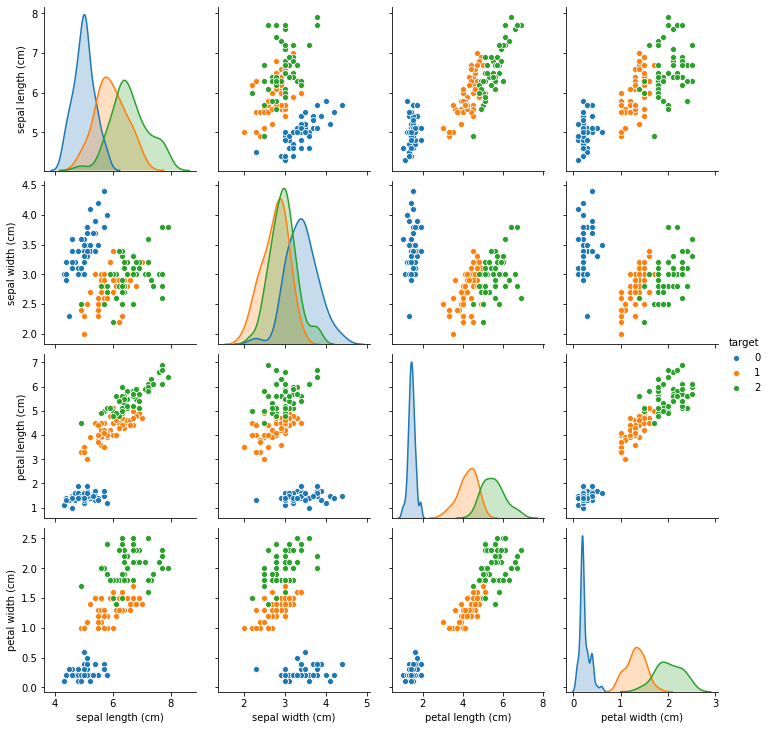

In [8]:
sns.pairplot(iris_df, vars=feature_names, hue="target")
plt.show()

The relationship between petal length and petal width looks linear. Let's fit a regression line to this relationship.

In [9]:
x = iris_df["petal length (cm)"]
y = iris_df["petal width (cm)"]

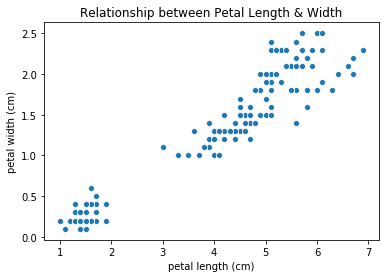

In [10]:
sns.scatterplot(x=x, y=y)
plt.title("Relationship between Petal Length & Width")
plt.show()

In [11]:
# Resource: https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

class LinReg():
    def __init__(self, lr=0.01, n_iter=500):
        self.lr = lr
        self.n_iter = n_iter
    
    def cost(self, h, y):
        return np.sum((h - y)**2) / (2 * y.size)
        
    def fit(self, x, y):
        x = np.c_[np.ones(x.shape[0]), x] 
        self.theta = np.zeros(x.shape[1])
        self.costs = []
        self.theta_history = []
        
        for i in range(self.n_iter):
            h = np.dot(x, self.theta)
            gradient = (1 / y.size) * np.dot(x.T, (h - y))
            self.theta -= self.lr * gradient
            self.costs.append(self.cost(h, y))
            self.theta_history.append(self.theta.copy()) # Strange things happen without the .copy()
            
        return self.theta, self.costs
    
    def plot_fit(self, x, y):
        x_lim = [np.min(x), np.max(x)]
        y_fit = self.theta[0] + np.dot(self.theta[1], x_lim)

        plt.figure(figsize=(10,8))
        plt.title("Linear Regression via Gradient Descent")
        sns.lineplot(x_lim, y_fit)
        sns.scatterplot(x=x, y=y, hue=y, legend=False, palette="spring", s=50)
        plt.show()

In [12]:
model = LinReg(lr=0.005, n_iter=1000)
theta, cost = model.fit(x, y)

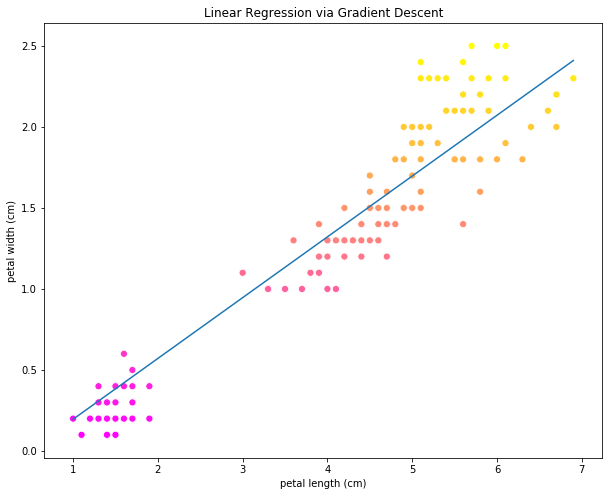

In [13]:
model.plot_fit(x, y)

### Generate Gradient Descent Animation

In [16]:
# Credit: https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

#Set the plot up,
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
plt.title('Linear Regression via Gradient Descent')
sns.scatterplot(x=x, y=y, hue=y, legend=False, palette="spring", s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
line, = ax.plot([], [], lw=2)
annotation = ax.text(1.5, 2, '', fontsize=13)
annotation.set_animated(True)
plt.close()

# Initialize animation
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# Generate animation frame
def animate(i):
    past_thetas = model.theta_history
    costs = model.costs
    # Generate line using current iteration's thetas
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.3f' % (costs[i]))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('output/linear-regression-gradient-descent-animation-2.gif', writer="imagemagick", fps = 30)

# Alternatively, save as .mp4
# anim.save('output/linear-regression-gradient-descent-animation.mp4', fps = 30)